In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
# Load the datasets
dept_rating = pd.read_csv('/content/DeptRating.csv')
hosp_doct = pd.read_excel('/content/Hosp_Doct.xlsx')
dept_doct_interlayer = pd.read_csv('/content/DeptDoct_InterLayer_AdjcMatrix.csv')
hosp_rating = pd.read_csv('/content/Hosp_Rating.csv')
doct_rating = pd.read_csv('/content/DoctRating.csv')
doct_intralayer = pd.read_csv('/content/Doct_IntraLayer_AdjcMatrix.csv')
hospdept_interlayer = pd.read_csv('/content/HospDept_InterLayer_AdjcMatrix.csv')
hospt_intralayer = pd.read_csv('/content/HospDept_InterLayer_AdjcMatrix.csv')
dept_intralayer = pd.read_csv('/content/Dept_IntraLayer_AdjcMatrix.csv')


<ipython-input-8-4ef1dd0b3092>:32: RuntimeWarning: invalid value encountered in divide
  trust_matrix = adj_matrix_array / adj_matrix_array.sum(axis=1, keepdims=True)


Number of trust scores for hospitals: 100
Number of trust scores for departments: 64
Number of trust scores for doctors: 5929


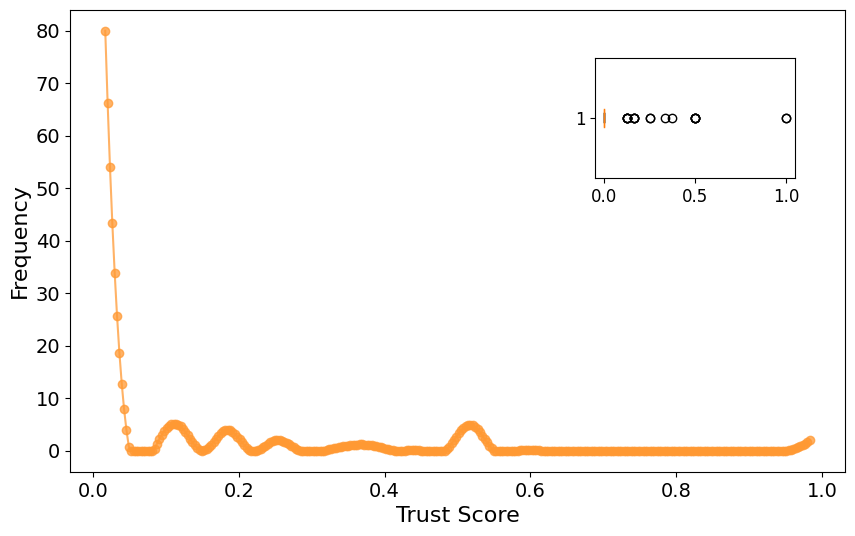

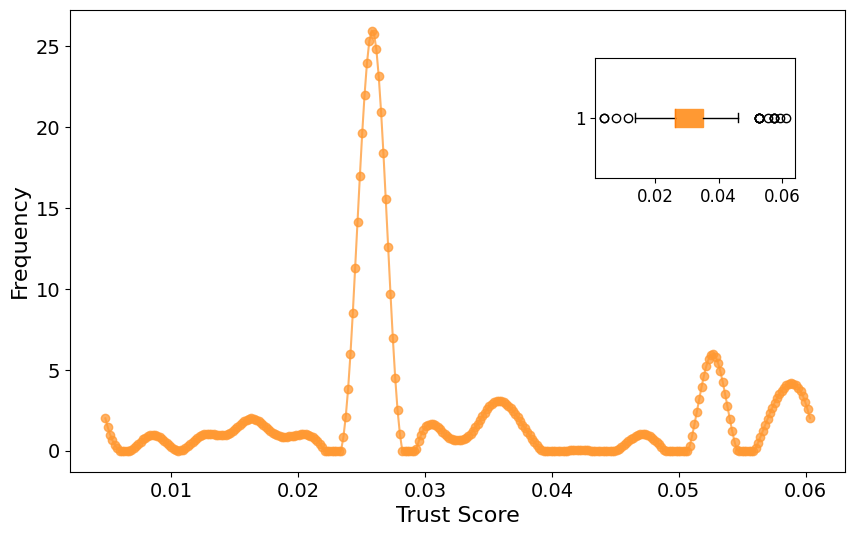

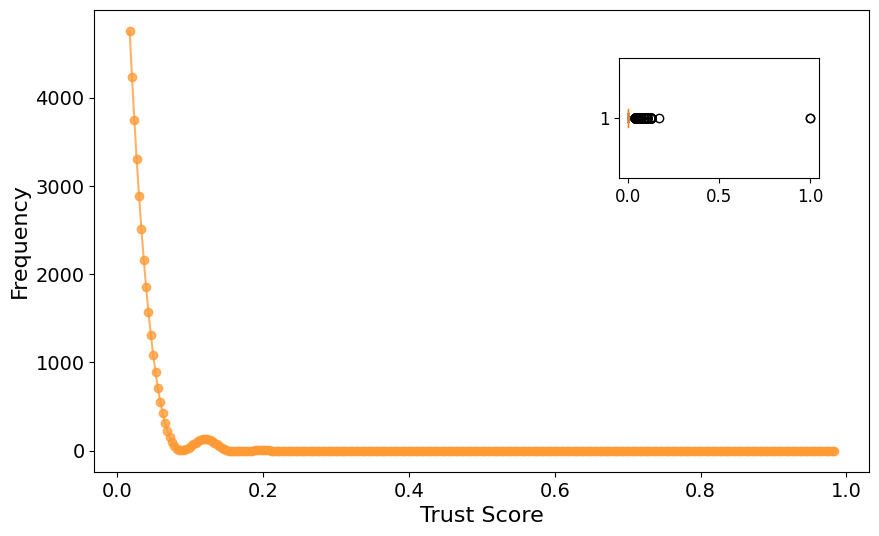

In [ ]:
# Function to plot trust score distribution with line chart and box plot
def plot_trust_distribution_with_line(trust_scores):
    plt.figure(figsize=(10, 6))

    # Compute histogram data
    counts, bin_edges = np.histogram(trust_scores, bins=30)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Create a smooth spline
    spline = make_interp_spline(bin_centers, counts)
    smooth_bin_centers = np.linspace(bin_centers.min(), bin_centers.max(), 300)
    smooth_counts = np.maximum(spline(smooth_bin_centers), 0)

    # Plot the smooth line chart in the custom color
    plt.plot(smooth_bin_centers, smooth_counts, alpha=0.75, marker='o', color=(1.0, 0.6, 0.2))
    plt.xlabel('Trust Score', fontsize=16)  # Increased font size for x-axis label
    plt.ylabel('Frequency', fontsize=16)    # Increased font size for y-axis label
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Adding a boxplot with improved readability
    plt.axes([0.65, 0.6, 0.2, 0.2])
    plt.boxplot(trust_scores, vert=False, patch_artist=True, boxprops=dict(facecolor=(1.0, 0.6, 0.2), color=(1.0, 0.6, 0.2)))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

# Function to convert adjacency matrix to trust matrix
def convert_to_trust_matrix(adjacency_matrix, num_entities):
    adj_matrix_array = np.array(adjacency_matrix.iloc[:num_entities, 1:num_entities+1], dtype=float)
    trust_matrix = adj_matrix_array / adj_matrix_array.sum(axis=1, keepdims=True)
    trust_matrix = np.nan_to_num(trust_matrix)
    return trust_matrix

# Number of entities
num_hospitals = 10
num_doctors = 77
num_departments = 32  # Assuming 32 departments

# Convert adjacency matrices to trust matrices
trust_matrix_dept = convert_to_trust_matrix(dept_intralayer, num_departments)
trust_matrix_hosp = convert_to_trust_matrix(hospt_intralayer, num_hospitals)
trust_matrix_doct = convert_to_trust_matrix(doct_intralayer, num_doctors)

# Flatten the trust matrices
trust_scores_hosp = trust_matrix_hosp.flatten()
trust_scores_dept = trust_matrix_dept.flatten()
trust_scores_doct = trust_matrix_doct.flatten()

# Ensure no negative values in trust scores
trust_scores_hosp = np.maximum(trust_scores_hosp, 0)
trust_scores_dept = np.maximum(trust_scores_dept, 0)
trust_scores_doct = np.maximum(trust_scores_doct, 0)

# Print the number of trust scores for verification
print(f"Number of trust scores for hospitals: {len(trust_scores_hosp)}")
print(f"Number of trust scores for departments: {len(trust_scores_dept)}")
print(f"Number of trust scores for doctors: {len(trust_scores_doct)}")

# Plot the trust score distributions
plot_trust_distribution_with_line(trust_scores_hosp)
plot_trust_distribution_with_line(trust_scores_dept)
plot_trust_distribution_with_line(trust_scores_doct)

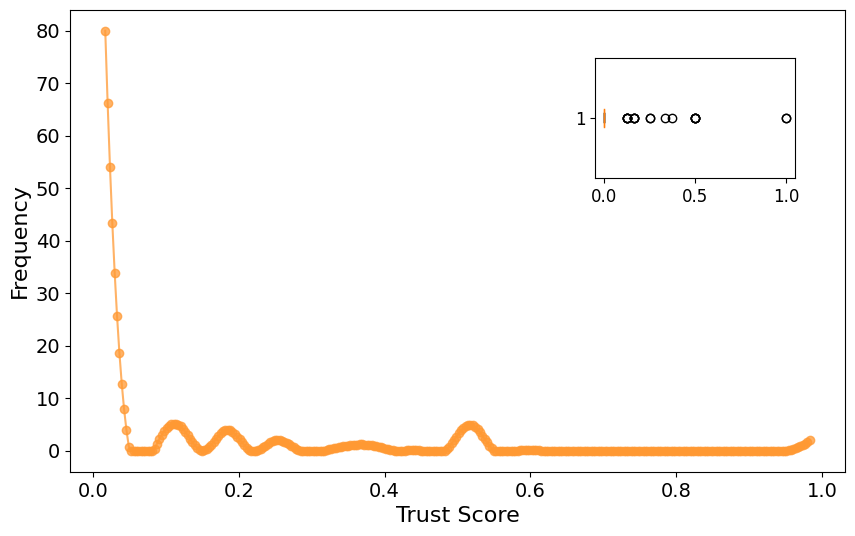

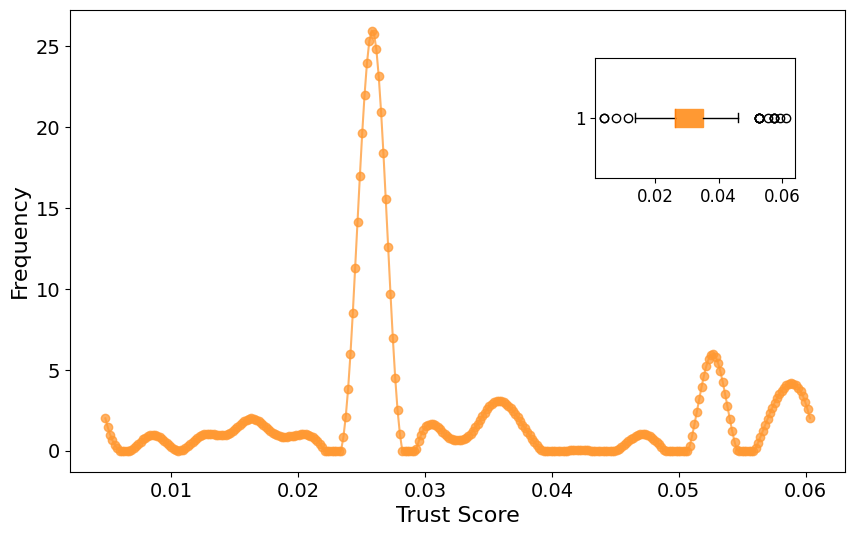

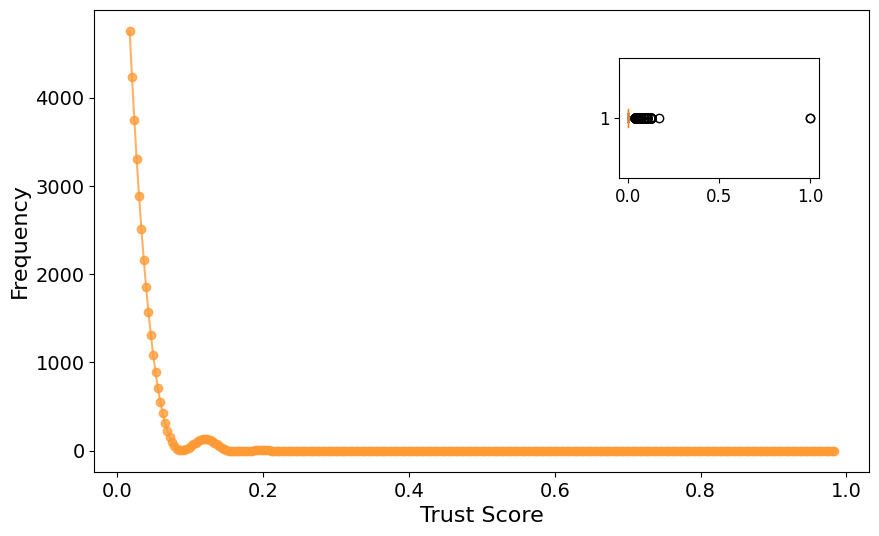

In [ ]:
# Flatten the trust matrices
trust_scores_hosp = trust_matrix_hosp.flatten()
trust_scores_dept = trust_matrix_dept.flatten()
trust_scores_doct = trust_matrix_doct.flatten()

trust_scores_dept = np.maximum(trust_scores_dept, 0)

# Plot the trust score distributions
plot_trust_distribution_with_line(trust_scores_hosp)
plot_trust_distribution_with_line(trust_scores_dept)
plot_trust_distribution_with_line(trust_scores_doct)

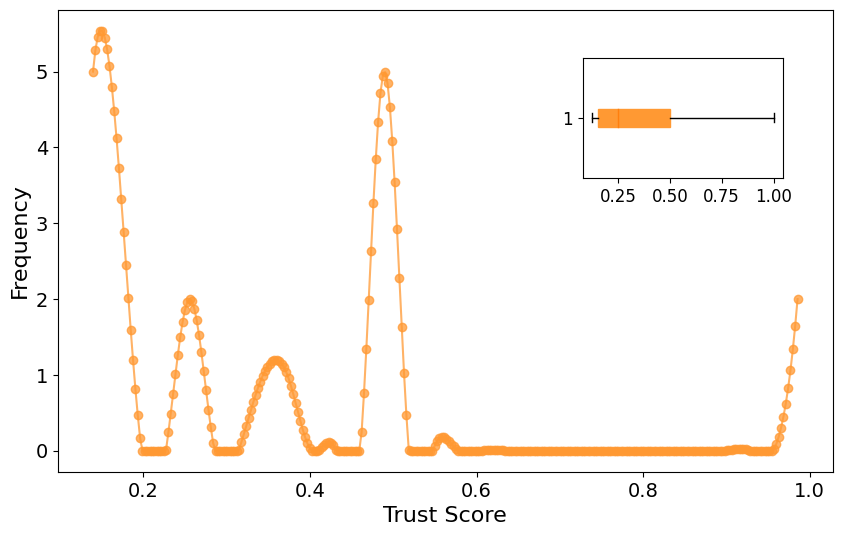

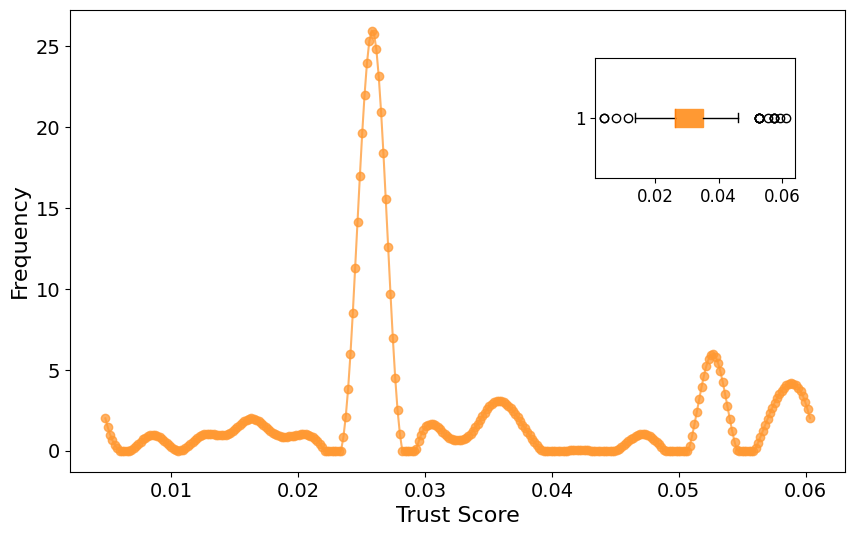

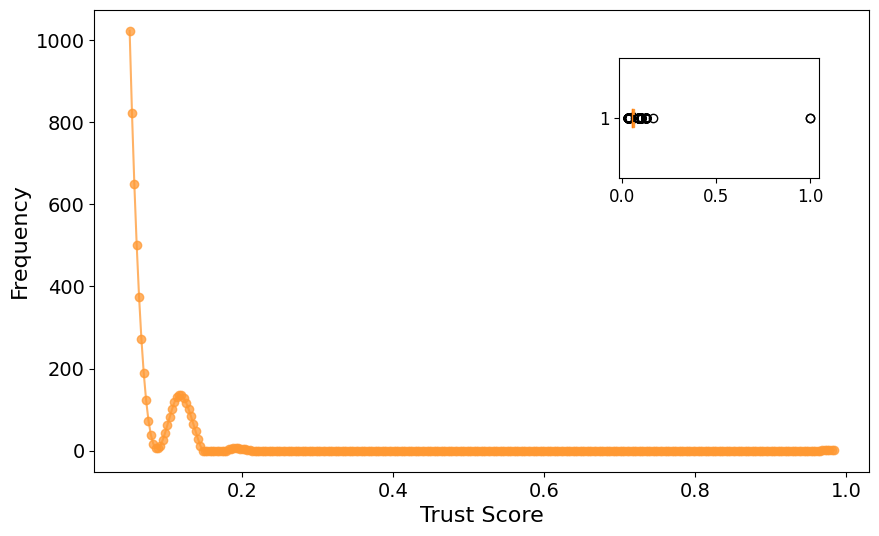

In [ ]:
# Exclude zero or near-zero trust scores
trust_scores_hosp_nonzero = trust_scores_hosp[trust_scores_hosp > 0]
trust_scores_dept_nonzero = trust_scores_dept[trust_scores_dept > 0]
trust_scores_doct_nonzero = trust_scores_doct[trust_scores_doct > 0]

# Plot the trust score distributions
plot_trust_distribution_with_line(trust_scores_hosp_nonzero)
plot_trust_distribution_with_line(trust_scores_dept_nonzero)
plot_trust_distribution_with_line(trust_scores_doct_nonzero)

In [ ]:
# Print the number of non-zero trust scores for verification
print(f"Number of non-zero trust scores for hospitals: {len(trust_scores_hosp_nonzero)}")
print(f"Number of non-zero trust scores for departments: {len(trust_scores_dept_nonzero)}")
print(f"Number of non-zero trust scores for doctors: {len(trust_scores_doct_nonzero)}")

Number of non-zero trust scores for hospitals: 20
Number of non-zero trust scores for departments: 64
Number of non-zero trust scores for doctors: 1172


<ipython-input-4-d937cd1cc722>:13: RuntimeWarning: invalid value encountered in divide
  trust_matrix = adj_matrix_array / adj_matrix_array.sum(axis=1, keepdims=True)


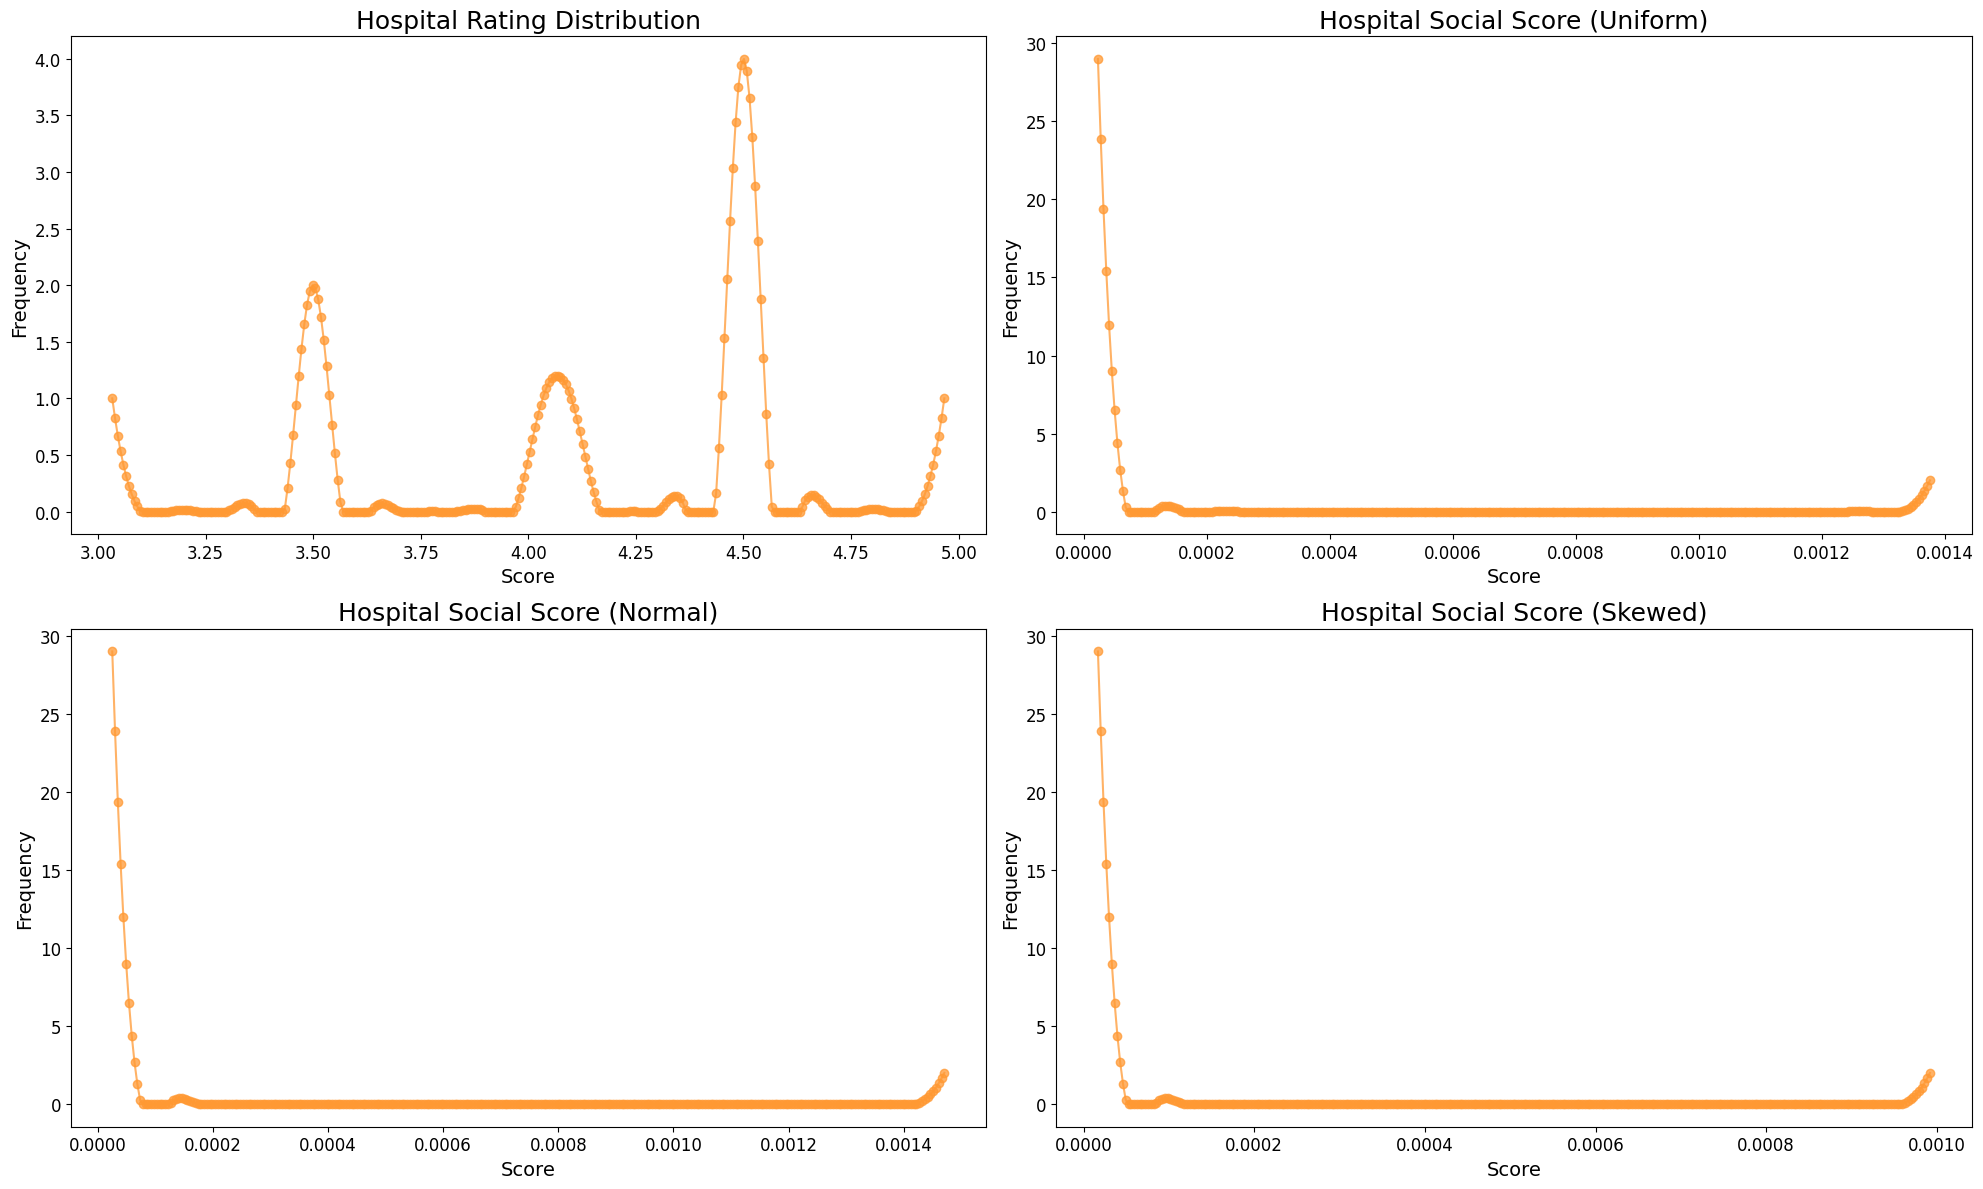

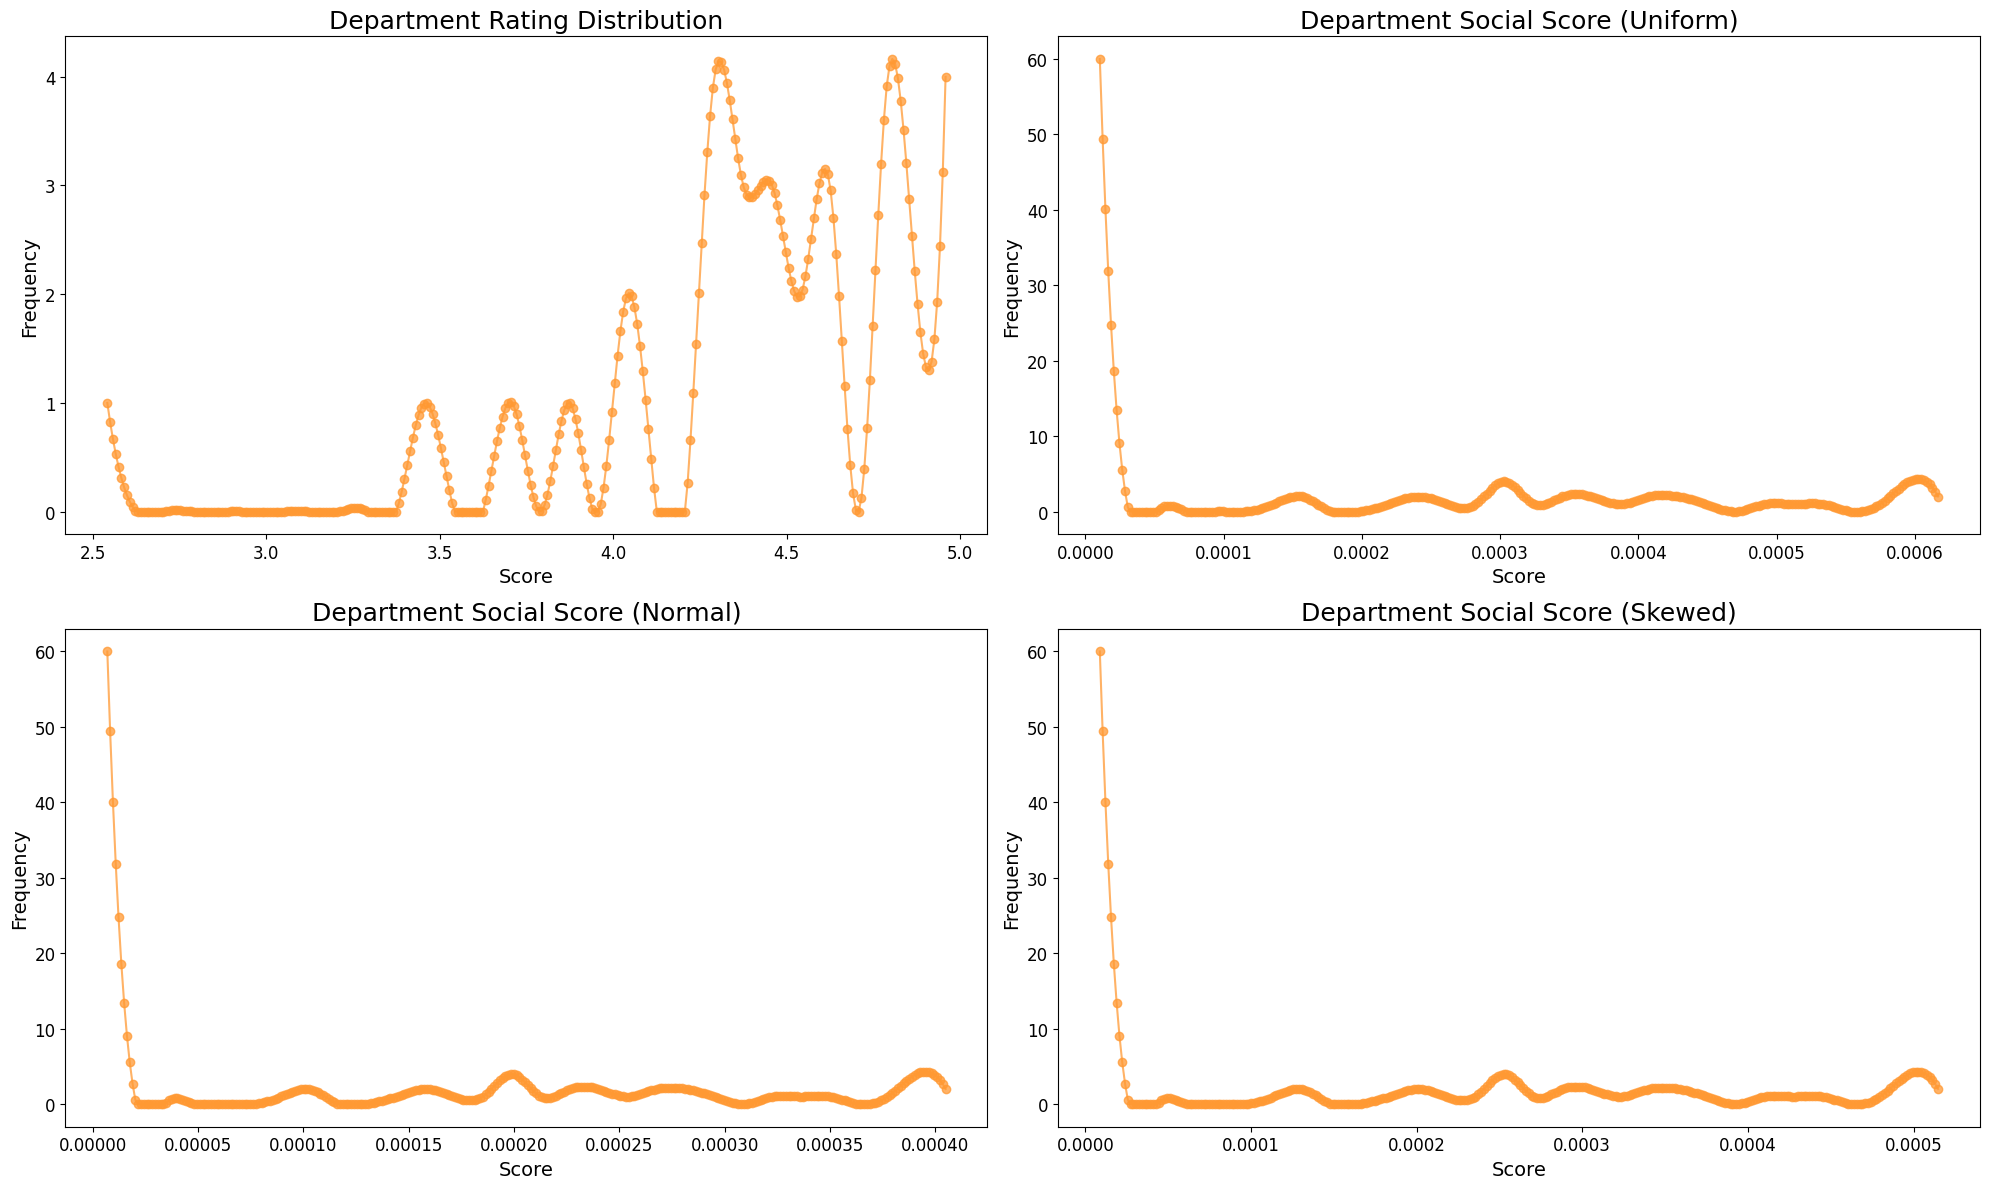

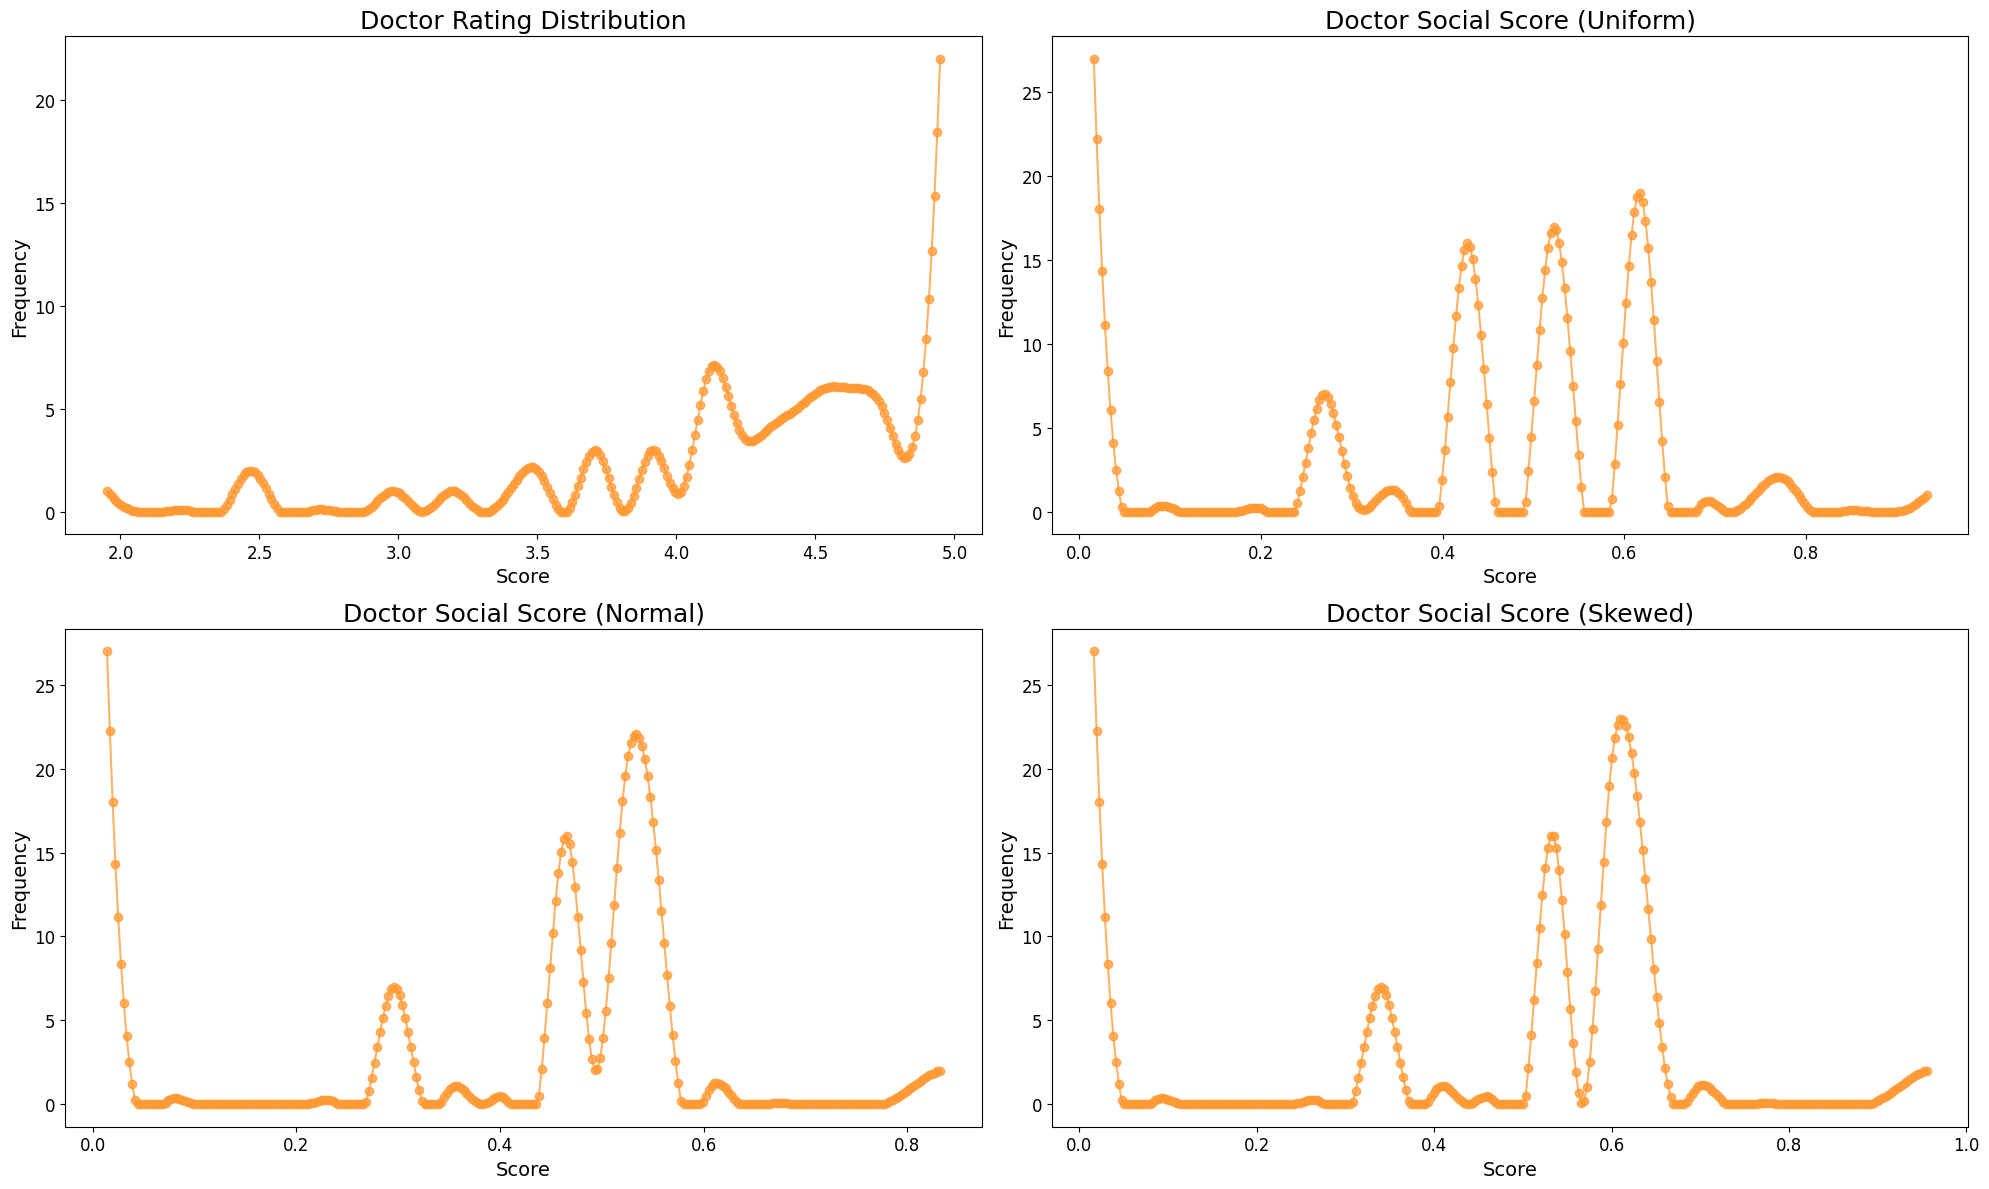

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skewnorm, norm
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Define the RGB values for the desired color
custom_color = (255/255, 153/255, 51/255)  # RGB values of the color from the image

# Function to convert adjacency matrix to trust matrix
def convert_to_trust_matrix(adjacency_matrix):
    adj_matrix_array = np.array(adjacency_matrix.iloc[:, 1:], dtype=float)
    trust_matrix = adj_matrix_array / adj_matrix_array.sum(axis=1, keepdims=True)
    trust_matrix = np.nan_to_num(trust_matrix)
    return trust_matrix

# Function to generate residual social scores
def generate_residual_scores(distribution_type, size):
    if distribution_type == "uniform":
        return np.random.uniform(0, 1, size)
    elif distribution_type == "normal":
        return np.random.normal(0.5, 0.1, size)
    elif distribution_type == "skewed":
        return skewnorm.rvs(a=10, loc=0.5, scale=0.1, size=size)
    else:
        raise ValueError("Invalid distribution type")

# Pad the vectors/matrices to the same dimension
def pad_to_max_dimension(matrix, max_dimension):
    padded_matrix = np.zeros((max_dimension, max_dimension))
    padded_matrix[:matrix.shape[0], :matrix.shape[1]] = matrix
    return padded_matrix

def pad_vector(vector, max_dimension):
    padded_vector = np.zeros(max_dimension)
    padded_vector[:len(vector)] = vector
    return padded_vector

# Calculate initial social scores
def calculate_initial_social_scores(delta_alpha, delta_beta, tau_beta_alpha):
    max_dim = max(len(delta_alpha), len(delta_beta), tau_beta_alpha.shape[0], tau_beta_alpha.shape[1])
    delta_alpha_padded = pad_vector(delta_alpha, max_dim)
    delta_beta_padded = pad_vector(delta_beta, max_dim)
    tau_beta_alpha_padded = pad_to_max_dimension(tau_beta_alpha, max_dim)
    return delta_alpha_padded + np.dot(delta_beta_padded, tau_beta_alpha_padded.T)

# Refine social scores until convergence
def refine_social_scores(S_initial, tau_alpha, threshold=0.001, max_iterations=1000):
    max_dim = max(S_initial.shape[0], tau_alpha.shape[0], tau_alpha.shape[1])
    S_initial_padded = pad_vector(S_initial, max_dim)
    tau_alpha_padded = pad_to_max_dimension(tau_alpha, max_dim)
    S = S_initial_padded
    for _ in range(max_iterations):
        S_next = np.dot(S, tau_alpha_padded)
        if np.max(np.abs(S_next - S)) <= threshold:
            break
        S = S_next
    return S

# Function to plot distributions
def plot_distributions(entity, ratings, social_scores_uniform, social_scores_normal, social_scores_skewed):
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))

    def plot_single_distribution(ax, data, title):
        counts, bin_edges = np.histogram(data, bins=30)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        spline = make_interp_spline(bin_centers, counts)
        smooth_bin_centers = np.linspace(bin_centers.min(), bin_centers.max(), 300)
        smooth_counts = np.maximum(spline(smooth_bin_centers), 0)
        ax.plot(smooth_bin_centers, smooth_counts, alpha=0.75, marker='o', color=custom_color)
        ax.set_title(title, fontsize=18)
        ax.set_xlabel('Score', fontsize=14)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)

    plot_single_distribution(axes[0, 0], ratings, f'{entity} Rating Distribution')
    plot_single_distribution(axes[0, 1], social_scores_uniform, f'{entity} Social Score (Uniform)')
    plot_single_distribution(axes[1, 0], social_scores_normal, f'{entity} Social Score (Normal)')
    plot_single_distribution(axes[1, 1], social_scores_skewed, f'{entity} Social Score (Skewed)')

    plt.tight_layout()
    plt.show()



# Convert adjacency matrices to trust matrices
trust_matrix_dept = convert_to_trust_matrix(dept_intralayer)
trust_matrix_hosp = convert_to_trust_matrix(hospt_intralayer)
trust_matrix_hosp_dept = convert_to_trust_matrix(hospdept_interlayer)
trust_matrix_doct = convert_to_trust_matrix(doct_intralayer)
trust_matrix_dept_doct = convert_to_trust_matrix(dept_doct_interlayer)

# Generate residual social scores and calculate social scores
size_hosp = trust_matrix_hosp.shape[0]
size_dept = trust_matrix_dept.shape[0]
size_doct = trust_matrix_doct.shape[0]

# Hospitals
delta_hosp_uniform = generate_residual_scores("uniform", size_hosp)
delta_hosp_normal = generate_residual_scores("normal", size_hosp)
delta_hosp_skewed = generate_residual_scores("skewed", size_hosp)
delta_dept_uniform = generate_residual_scores("uniform", size_dept)
delta_dept_normal = generate_residual_scores("normal", size_dept)
delta_dept_skewed = generate_residual_scores("skewed", size_dept)

S_hosp0_uniform = calculate_initial_social_scores(delta_hosp_uniform, delta_dept_uniform, trust_matrix_hosp_dept)
S_hosp0_normal = calculate_initial_social_scores(delta_hosp_normal, delta_dept_normal, trust_matrix_hosp_dept)
S_hosp0_skewed = calculate_initial_social_scores(delta_hosp_skewed, delta_dept_skewed, trust_matrix_hosp_dept)

S_hosp_uniform = refine_social_scores(S_hosp0_uniform, trust_matrix_hosp)
S_hosp_normal = refine_social_scores(S_hosp0_normal, trust_matrix_hosp)
S_hosp_skewed = refine_social_scores(S_hosp0_skewed, trust_matrix_hosp)

ratings_hosp = hosp_rating['Hosp_Rating'].to_numpy()
plot_distributions('Hospital', ratings_hosp, S_hosp_uniform, S_hosp_normal, S_hosp_skewed)

# Departments
delta_doct_uniform = generate_residual_scores("uniform", size_doct)
delta_doct_normal = generate_residual_scores("normal", size_doct)
delta_doct_skewed = generate_residual_scores("skewed", size_doct)

S_dept0_uniform = calculate_initial_social_scores(delta_dept_uniform, delta_doct_uniform, trust_matrix_dept_doct)
S_dept0_normal = calculate_initial_social_scores(delta_dept_normal, delta_doct_normal, trust_matrix_dept_doct)
S_dept0_skewed = calculate_initial_social_scores(delta_dept_skewed, delta_doct_skewed, trust_matrix_dept_doct)

S_dept_uniform = refine_social_scores(S_dept0_uniform, trust_matrix_dept)
S_dept_normal = refine_social_scores(S_dept0_normal, trust_matrix_dept)
S_dept_skewed = refine_social_scores(S_dept0_skewed, trust_matrix_dept)

ratings_dept = dept_rating['Dept_Rating'].to_numpy()
plot_distributions('Department', ratings_dept, S_dept_uniform, S_dept_normal, S_dept_skewed)

# Doctors
S_doct0_uniform = calculate_initial_social_scores(delta_doct_uniform, delta_dept_uniform, trust_matrix_dept_doct)
S_doct0_normal = calculate_initial_social_scores(delta_doct_normal, delta_dept_normal, trust_matrix_dept_doct)
S_doct0_skewed = calculate_initial_social_scores(delta_doct_skewed, delta_dept_skewed, trust_matrix_dept_doct)

S_doct_uniform = refine_social_scores(S_doct0_uniform, trust_matrix_doct)
S_doct_normal = refine_social_scores(S_doct0_normal, trust_matrix_doct)
S_doct_skewed = refine_social_scores(S_doct0_skewed, trust_matrix_doct)

ratings_doct = doct_rating['Doct_Rating'].to_numpy()
plot_distributions('Doctor', ratings_doct, S_doct_uniform, S_doct_normal, S_doct_skewed)

In [ ]:
from scipy.stats import spearmanr

# Function to match dimensions by padding with zeros or truncating
def match_dimensions(arr1, arr2):
    max_len = max(len(arr1), len(arr2))
    arr1_padded = np.pad(arr1, (0, max_len - len(arr1)), 'constant')
    arr2_padded = np.pad(arr2, (0, max_len - len(arr2)), 'constant')
    return arr1_padded, arr2_padded

# Calculate Spearman rank correlation
def calculate_spearman_correlation(ratings, social_scores_uniform, social_scores_normal, social_scores_skewed):
    ratings_padded, S_uniform_padded = match_dimensions(ratings, social_scores_uniform)
    _, S_normal_padded = match_dimensions(ratings, social_scores_normal)
    _, S_skewed_padded = match_dimensions(ratings, social_scores_skewed)

    corr_uniform, _ = spearmanr(ratings_padded, S_uniform_padded)
    corr_normal, _ = spearmanr(ratings_padded, S_normal_padded)
    corr_skewed, _ = spearmanr(ratings_padded, S_skewed_padded)
    return corr_uniform, corr_normal, corr_skewed

# Hospitals
corr_hosp_uniform, corr_hosp_normal, corr_hosp_skewed = calculate_spearman_correlation(
    ratings_hosp, S_hosp_uniform, S_hosp_normal, S_hosp_skewed)
print(f'Hospital Layer - Spearman Correlation (Uniform): {corr_hosp_uniform}')
print(f'Hospital Layer - Spearman Correlation (Normal): {corr_hosp_normal}')
print(f'Hospital Layer - Spearman Correlation (Skewed): {corr_hosp_skewed}')

# Departments
corr_dept_uniform, corr_dept_normal, corr_dept_skewed = calculate_spearman_correlation(
    ratings_dept, S_dept_uniform, S_dept_normal, S_dept_skewed)
print(f'Department Layer - Spearman Correlation (Uniform): {corr_dept_uniform}')
print(f'Department Layer - Spearman Correlation (Normal): {corr_dept_normal}')
print(f'Department Layer - Spearman Correlation (Skewed): {corr_dept_skewed}')

# Doctors
corr_doct_uniform, corr_doct_normal, corr_doct_skewed = calculate_spearman_correlation(
    ratings_doct, S_doct_uniform, S_doct_normal, S_doct_skewed)
print(f'Doctor Layer - Spearman Correlation (Uniform): {corr_doct_uniform}')
print(f'Doctor Layer - Spearman Correlation (Normal): {corr_doct_normal}')
print(f'Doctor Layer - Spearman Correlation (Skewed): {corr_doct_skewed}')

Hospital Layer - Spearman Correlation (Uniform): -0.001461055772926166
Hospital Layer - Spearman Correlation (Normal): -0.001461055772926166
Hospital Layer - Spearman Correlation (Skewed): -0.001461055772926166
Department Layer - Spearman Correlation (Uniform): 0.9087642407281878
Department Layer - Spearman Correlation (Normal): 0.9087642407281878
Department Layer - Spearman Correlation (Skewed): 0.9087642407281878
Doctor Layer - Spearman Correlation (Uniform): 0.5050946466236372
Doctor Layer - Spearman Correlation (Normal): 0.46137249402754194
Doctor Layer - Spearman Correlation (Skewed): 0.46592605022022426
